In [1]:
import numpy as np
import astropy
import astropy.units as ur
import astropy.constants as cr
%matplotlib inline
from tdsat_sensitivity import find_limit, compute_snr
import matplotlib.pyplot as plt


In [16]:
# Set inputs here. Currently set at Ultrasat values to compare with Rick
qe = 0.8
exposure = 300*ur.s
psf_size = 10*ur.arcsec
efficiency = 0.87


td1_band = [180, 220]*ur.nm
td2_band = [260, 320]*ur.nm
td3_band = [340, 380]*ur.nm





In [33]:
# Loop over "effective area" where we basically freeze the telescope diameter at 35 cm
# and then see what the effective of changing the optical efficiency is. Do this here
# for the "low" zodiacal light case for the td2_band.

diameter = 35*ur.cm
effArea = []
psf_req = []
for eff in np.arange(10)/20.:
    efficiency = (0.9 - eff)
    area = efficiency*np.pi * (0.5*diameter)**2
    psf_array = (15 - np.arange(15))
    psf_array = np.append(psf_array, 0.01)
    found = False
    last_psf = 15
    for psf in psf_array:

        psf_size = psf*ur.arcsec
        
        snr = compute_snr(td2_band,22*ur.ABmag, low_zodi=True,diameter=diameter,
                          efficiency = efficiency, qe = qe, psf_size = psf_size)
        
        if (snr <= 10.):
            last_psf = psf
            continue
        else:
            found = True
            break
            
    if found:
        psf_req.append(last_psf)
        print(efficiency, area, last_psf, snr)

    else:
        print('Not found...')
        psf_req.append(0.)
        print(efficiency, area, 0., snr)

    effArea.append(area.value)
 
    



0.9 865.9014751456867 cm2 8.0 10.424274871110244
0.85 817.795837637593 cm2 8.0 10.08023584451119
0.8 769.6902001294993 cm2 7.0 10.486705928791181
0.75 721.5845626214056 cm2 7.0 10.080716123627878
0.7 673.4789251133119 cm2 6.0 10.377909460438806
0.65 625.3732876052181 cm2 5.0 10.568695262245637
0.6 577.2676500971246 cm2 5.0 10.015066277572387
0.55 529.1620125890308 cm2 3.0 10.403747902146833
0.5 481.0563750809371 cm2 1.0 10.05258864123015
Not found...
0.45 432.95073757284337 cm2 0.0 9.276087748097591


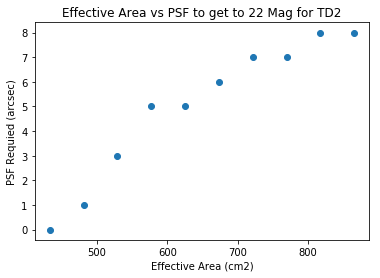

In [34]:

plt.scatter(effArea, psf_req)
plt.title('Effective Area vs PSF to get to 22 Mag for TD2')
plt.ylabel('PSF Requied (arcsec)')
plt.xlabel('Effective Area (cm2)')
plt.show()

